<h2><a href="https://leetcode.com/problems/minimum-number-of-coins-for-fruits">2944. Minimum Number of Coins for Fruits</a></h2><h3>Medium</h3><hr><p>You are given an integer array <code>prices</code> where <code>prices[i]</code> denotes the number of coins needed to purchase the <code>i<sup>th</sup></code> fruit.</p>

<p>The fruit market has the following reward for each fruit:</p>

<ul>
	<li>If you purchase the <code>i<sup>th</sup></code> fruit at <code>prices[i]</code> coins, you can get any number of the next <code>(i + 1)</code> fruits for free.</li>
</ul>

<p><strong>Note</strong> that even if you <strong>can</strong> take fruit <code>j</code> for free, you can still purchase it for <code>prices[j]</code> coins to receive its reward.</p>

<p>Return the <strong>minimum</strong> number of coins needed to acquire all the fruits.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<div class="example-block">
<p><strong>Input:</strong> <span class="example-io">prices = [3,1,2]</span></p>

<p><strong>Output:</strong> <span class="example-io">4</span></p>

<p><strong>Explanation:</strong></p>

<ul>
	<li>Purchase the 1<sup>st</sup> fruit with <code>prices[0] = 3</code> coins, you are allowed to take the 2<sup>nd</sup> fruit for free.</li>
	<li>Purchase the 2<sup>nd</sup> fruit with <code>prices[1] = 1</code> coin, you are allowed to take the 3<sup>rd</sup> fruit for free.</li>
	<li>Take the 3<sup>rd</sup> fruit for free.</li>
</ul>

<p>Note that even though you could take the 2<sup>nd</sup> fruit for free as a reward of buying 1<sup>st</sup> fruit, you purchase it to receive its reward, which is more optimal.</p>
</div>

<p><strong class="example">Example 2:</strong></p>

<div class="example-block">
<p><strong>Input:</strong> <span class="example-io">prices = [1,10,1,1]</span></p>

<p><strong>Output:</strong> <span class="example-io">2</span></p>

<p><strong>Explanation:</strong></p>

<ul>
	<li>Purchase the 1<sup>st</sup> fruit with <code>prices[0] = 1</code> coin, you are allowed to take the 2<sup>nd</sup> fruit for free.</li>
	<li>Take the 2<sup>nd</sup> fruit for free.</li>
	<li>Purchase the 3<sup>rd</sup> fruit for <code>prices[2] = 1</code> coin, you are allowed to take the 4<sup>th</sup> fruit for free.</li>
	<li>Take the 4<sup>t</sup><sup>h</sup> fruit for free.</li>
</ul>
</div>

<p><strong class="example">Example 3:</strong></p>

<div class="example-block">
<p><strong>Input:</strong> <span class="example-io">prices = [26,18,6,12,49,7,45,45]</span></p>

<p><strong>Output:</strong> <span class="example-io">39</span></p>

<p><strong>Explanation:</strong></p>

<ul>
	<li>Purchase the 1<sup>st</sup> fruit with <code>prices[0] = 26</code> coin, you are allowed to take the 2<sup>nd</sup> fruit for free.</li>
	<li>Take the 2<sup>nd</sup> fruit for free.</li>
	<li>Purchase the 3<sup>rd</sup> fruit for <code>prices[2] = 6</code> coin, you are allowed to take the 4<sup>th</sup>, 5<sup>th</sup> and 6<sup>th</sup> (the next three) fruits for free.</li>
	<li>Take the 4<sup>t</sup><sup>h</sup> fruit for free.</li>
	<li>Take the 5<sup>t</sup><sup>h</sup> fruit for free.</li>
	<li>Purchase the 6<sup>th</sup> fruit with <code>prices[5] = 7</code> coin, you are allowed to take the 8<sup>th</sup> and 9<sup>th</sup> fruit for free.</li>
	<li>Take the 7<sup>t</sup><sup>h</sup> fruit for free.</li>
	<li>Take the 8<sup>t</sup><sup>h</sup> fruit for free.</li>
</ul>

<p>Note that even though you could take the 6<sup>th</sup> fruit for free as a reward of buying 3<sup>rd</sup> fruit, you purchase it to receive its reward, which is more optimal.</p>
</div>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= prices.length &lt;= 1000</code></li>
	<li><code>1 &lt;= prices[i] &lt;= 10<sup>5</sup></code></li>
</ul>


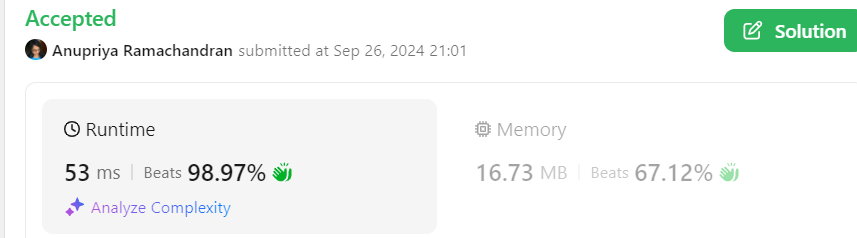

In [1]:
from collections import deque
from typing import List

class Solution:
    def minimumCoins(self, prices: List[int]) -> int:
        n = len(prices)
        minqueue = deque()
        minqueue.append(n)
        prices = prices + [0]


        for i in range(n-1, -1, -1):
            # Max Coverage
            max_index = min(n, 2*i + 2)

            # Remove out of window indexes
            while minqueue and minqueue[0] > max_index:
                minqueue.popleft()

            prices[i] += prices[minqueue[0]]

            while minqueue and prices[minqueue[-1]] > prices[i]:
                minqueue.pop()
            minqueue.append(i)

        return prices[0]